## Análise Preditiva de Derrame

### Contexto
- De acordo com a Sociedade Brasileira de Doenças Cerebrovasculares, o acidente vascular cerebral (AVC) é definido como um déficit neurológico súbito causado por um problema nos vasos sanguíneos do sistema nervoso central. Muitas pessoas usam o termo “derrame” quando o paciente sofre este episódio.    

##### Como se desenvolve o AVC
- “O AVC – acidente vascular cerebral (ou AVE; acidente vascular encefálico) – é conhecido popularmente como ‘derrame’ ou ‘trombose’. Este episódio pode ser classificado em dois tipos: AVC isquêmico, quando a artéria do cérebro se obstrui e ocasiona, consequentemente, uma isquemia (falta de sangue em determinada região); ou AVC hemorrágico, que é quando a artéria cerebral se rompe e causa um sangramento, uma hemorragia dentro do cérebro”, informa o cardiologista Francisco Flávio Costa Filho. 
- Segundo o especialista, o termo “trombose” estaria mais associado, na linguagem popular, ao AVC isquêmico, porque a obstrução da artéria ocorre em função da presença de um trombo. Já o termo “derrame” estaria mais associado ao AVC hemorrágico, porque o sangue “se derrama” dentro do cérebro.
- “No caso do AVC isquêmico, níveis elevados de pressão associados a outros fatores de risco (diabetes, colesterol elevado e tabagismo) levam à inflamação das artérias cerebrais, levando a formação de placas de colesterol ou espessamento da camada interna, até que obstrui completamente o vaso. No AVC Hemorrágico, esse mesmo processo inflamatório deixa a parede do vaso cerebral fragilizada de tal forma que ela, literalmente, se rompe, gerando o hematoma”, explica o cardiologista.

##### Prevenção e tratamento contra hipertensão e derrame
- Como a elevação da pressão está diretamente ligada à ocorrência do AVC, é essencial buscar formas de prevenir e tratar a hipertensão para, assim, diminuir também as chances de “derrame”. Portanto, deve-se apostar em uma alimentação saudável – nutritiva e pouco gordurosa e calórica – prática regular de atividades físicas, especialmente aeróbicas (corrida, ciclismo, natação, caminhada) e evitar fumar e ingerir bebidas alcoólicas em excesso. O tratamento medicamentoso contra hipertensão também é fundamental.

### Base de Dados
- A base de dados foi retirada do site kaggle: 'https://www.kaggle.com/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv';
- A fonte da base é confidencial.

##### Atributos:
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Expectativas Iniciais
- __@todo__

### Importando Bibliotecas
----

In [126]:
import numpy as np 
import requests
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import pycaret

from pycaret.regression import *
from io import StringIO

plt.style.use('ggplot')

### Upload da base de dados
----

In [127]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding='latin1')

df = df.drop('id', axis=1)
#display(df)
df.head(3)

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1

### Tratando valores nulos
----

In [128]:
# Itera cada coluna no arquivo
for coluna in df:
    # Se a coluna inteira tiver mais de 300 estão vazias...
    if df[coluna].isnull().sum() > 300:
        # Deleta a coluna
        df = df.drop(coluna, axis=1)
# Imprime somatório de campos vazios por coluna        
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [129]:
# Exclui todas as linhas que tiverem valores vazios
df = df.dropna()

# Imprime quantidade de linhas e colunas
print(df.shape)
# Imprime somatório de campos vazios por coluna 
print(df.isnull().sum())

(4909, 11)
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Análise dos tipos de dados e características das colunas
----

In [130]:
# Imprime o tipo de dado à cada coluna
print(df.dtypes)
# Imprime 60 -
print('-'*60)
# Imprime primeiro registro(linha) de cada coluna
print(df.iloc[0])

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------
gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object


In [131]:
df.describe().T

count        mean        std    min    25%    50%     75%  \
age                4909.0   42.865374  22.555115   0.08  25.00  44.00   60.00   
hypertension       4909.0    0.091872   0.288875   0.00   0.00   0.00    0.00   
heart_disease      4909.0    0.049501   0.216934   0.00   0.00   0.00    0.00   
avg_glucose_level  4909.0  105.305150  44.424341  55.12  77.07  91.68  113.57   
bmi                4909.0   28.893237   7.854067  10.30  23.50  28.10   33.10   
stroke             4909.0    0.042575   0.201917   0.00   0.00   0.00    0.00   

                      max  
age                 82.00  
hypertension         1.00  
heart_disease        1.00  
avg_glucose_level  271.74  
bmi                 97.60  
stroke               1.00

### Apresentação inicial da % de cada atributo
----

In [132]:
#!pip install plotly_express

import plotly_express as pe

cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
for col in cols:
    fig = pe.pie(values=df[col].groupby(df[col]).count(),names=df[col].groupby(df[col]).count().index,title="Distribution of {}".format(col))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

#### Notas

###### De acordo com os gráficos iniciais:
- Pessoas do sexo feminino sofrem proporcionalmente mais derrame;
- O quadro de hipertensão tem peso de quase 90% para potencial derrame;
- O histórico de doenças cardíacas tem peso de 95% para potencial derrame;
- A situação de histórico de casamento (atual ou já foi casado) tem relevância arredondada de 65% para a análise do caso;
- Quem trabalha em empresa privada tem mais da metade (57%) de chance de sofrer derrame do que o somatório de todos os outros tipos de distribuição de trabalho (próprio, com crianças e público). Desdes, a menor probabilidade está no setor público;
- O dado de tipo de residência - rural ou urbano - não tem muito diferencial, considerando uma distribuição proporcional equivalente: 49,3% para 50,7%;
- Não foi visto uma proporção alarmante entre o fator 'fumante' para a análise do caso;
- De todos os pesquisados, 4,26% já tiveram derrame.

### Tratamento das colunas não numéricas
----

In [133]:
# Retorna todas as colunas que não são int64 ou float64
df.select_dtypes(exclude=['int64','float64']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [134]:
# Tratando informações

#gender
df = df[(df["gender"] =="Male")|(df["gender"] =="Female")]
df.gender.replace({'Male': 1, 'Female': 0}, inplace=True)
#ever_married 
df.ever_married.replace({'No': 0, 'Yes': 1}, inplace=True)
#work_type
df.work_type.replace({'Private': 0, 'Self-employed': 1, 'children': 2,'Govt_job':3,'Never_worked':4}, inplace=True)
#Residence_type
df.Residence_type.replace({'Urban': 0, 'Rural': 1}, inplace=True)
#smoking_status
df.smoking_status.replace({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3}, inplace=True)

print(df.dtypes)
display(df)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          0   
2          1  80.0             0              1             1          0   
3          0  49.0             0              0             1          0   
4          0  79.0             1              0             1          1   
5          1  81.0             0              0             1          0   
...      ...   ...           ...            ...           ...        ...   
5104       0  13.0             0              0             0          2   
5106       0  81.0             0              0             1          1   
5107       0  35.0             0              0             1          1   
5108       1  51.0             0              0             1          0   
5109       0  44.0             0              0             1          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0                  0             228.69  36.6               2       1  
2                  1             105.92  32.5               0       1  
3                  0             171.23  34.4               3       1  
4                  1             174.12  24.0               0       1  
5                  0             186.21  29.0               2       1  
...              ...                ...   ...             ...     ...  
5104               1             103.08  18.6               1       0  
5106               0             125.20  40.0               0       0  
5107               1              82.99  30.6               0       0  
5108               1             166.29  25.6               2       0  
5109               0              85.28  26.2               1       0  

[4908 rows x 11 columns]

### Mapeamento da Correlação
----

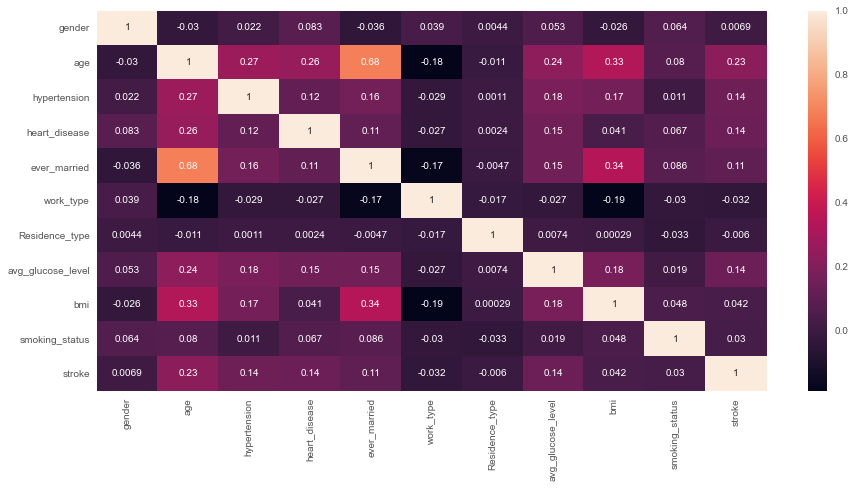

In [135]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

#### Notas

- Gênero não tem relação significativa direta com derrame;
- BMI não tem relação significativa direta com derrame;
- Tipo de Residência é insignificante diretamente com relação à derrame;
- O elemento que mais se aproxima no impacto direto ao diagnóstico de derrame é a idade;
- Decidimos manter as colunas não significativas em comparação à saída do dado 'stroke' porquê outras relações importantes podem ser feitas entre elas, por exemplo, bmi x ever_married ou bmi x age.

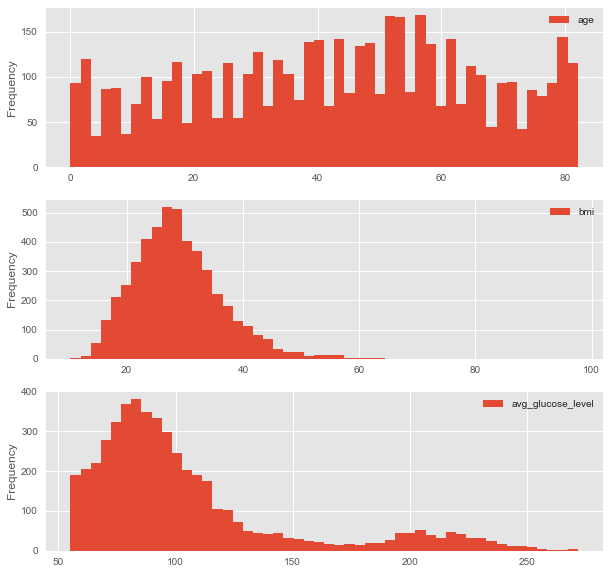

In [136]:
fig, axes = plt.subplots(3, figsize=(10, 10))

df.plot(kind="hist", y="age", bins=50, ax=axes[0])
df.plot(kind="hist", y="bmi", bins=50, ax=axes[1])
df.plot(kind="hist", y="avg_glucose_level", bins=50, ax=axes[2])
plt.show()

#### Notas

###### Índice de massa corporal
- Menor que 18,5	  Magreza	  0
- Entre 18,5 e 24,9	  Normal	  0
- Entre 25,0 e 29,9	  Sobrepeso	  Obesidade I
- Entre 30,0 e 39,9	  Obesidade	  Obesidade II

###### Nível de Glicose
- Glicemia de jejum normal: inferior a 99 mg/dL;
- Glicemia de jejum alterada: entre 100 mg/dL e 125 mg/dL;
- Diabetes: igual ou superior a 126 mg/dL;
- Glicemia de jejum baixa ou hipoglicemia: igual ou inferior a 70 mg/dL.

----------------------------------------------------------------
###### Sobre o público, observa-se dente os dados da base
- Há uma distribuição relativamente equilibrada, tendo um singelo crescimento do gráfico entre 55 e 60 anos;
- Um número muito elevado de pessoas entre 25 e 30 pontos no IMC, o que significa que a maioria tem sobrepeso;
- A grande maioria da população da base está com a glicemia normal, mas vemos resultados alarmantes no gráfico. Não o suficiente para considerar outlier. 

### Relacionamento em pares 1
----

In [137]:
def plot_mixing_features(features):
    sns.pairplot(df[features], 
            kind='reg', 
            plot_kws={'line_kws':{'color':'b'}, 'scatter_kws': {'alpha': 0.1}}),
             
    plt.show()

In [138]:
# Seleciona características/comorbidades numéricas (diferentes de enum e bool)
features = ['age', 'avg_glucose_level','bmi']
# Mostrar status básico
df[features].describe().T

count        mean        std    min      25%    50%  \
age                4908.0   42.868810  22.556128   0.08  25.0000  44.00   
avg_glucose_level  4908.0  105.297402  44.425550  55.12  77.0675  91.68   
bmi                4908.0   28.894560   7.854320  10.30  23.5000  28.10   

                       75%     max  
age                 60.000   82.00  
avg_glucose_level  113.495  271.74  
bmi                 33.100   97.60

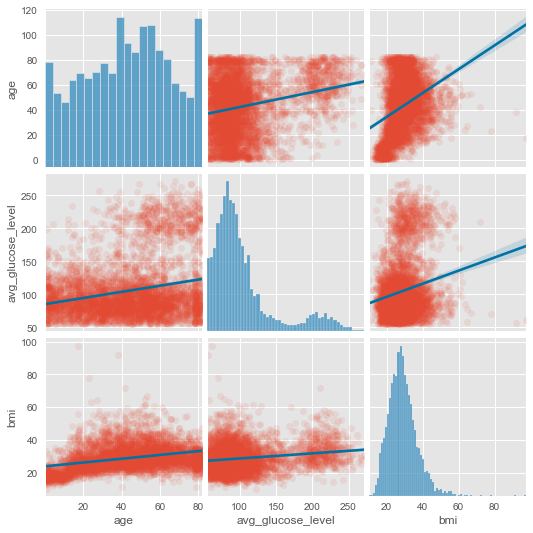

In [139]:
plot_mixing_features(features)

#### Notas

- O nível de glicose médio se mantém estável em uma média entre 100 e 125 mg/dL até os 43 anos
    * A partir dos 45 anos o número de casos de alta glicose no sangue aumenta, chegando a casos mais graves próximo a 60 anos
- Vemos que entre as idades de 30 e 60 anos o BMI da amostra apresenta situação de obesidade nível I
- Existe uma relevante paridade entre as features de BMI e nível de glicose. Ambas crescem em proporção semelhante.

### Aplicando regressão sobre os dados
----

In [140]:
df_reg = setup(df, target='stroke', session_id=123456789, log_experiment=True, experiment_name='health_prediction_analysis')

AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [141]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True

In [142]:
best = compare_models ()

In [166]:
# Criando novo modelo do tipo 'dt' - ensemble
#### dt = decision tree
# O modelo ensemble é a junção de vários modelos
# É como se houvesse vários juízes para decidir uma saída
dt = create_model('ada')

In [167]:
bagged_dt = ensemble_model(dt, n_estimators=50)

In [168]:
boosted_dt = ensemble_model(dt, method='Boosting')

### Interpretabilidade do modelo
----

In [169]:
# Aprimorar o modelo pelo 'R2'
best = automl(optimize='MAPE')
best

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

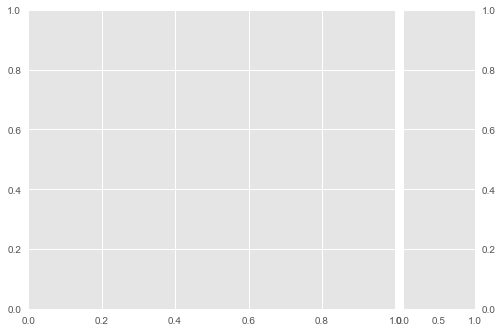

<Figure size 576x396 with 0 Axes>

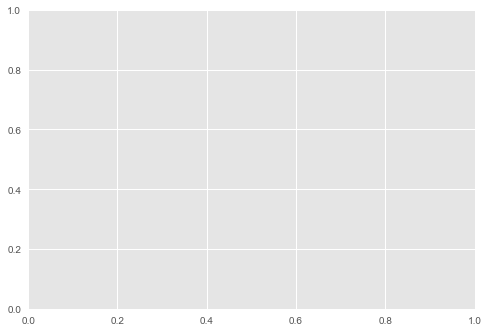

In [171]:
#plot_model(dt) 
#plot_model(dt,plot='error')

# Plotta todos os gráficos disponíveis no modelo
evaluate_model(dt)

__@todo: corrigir gráficos com erro__

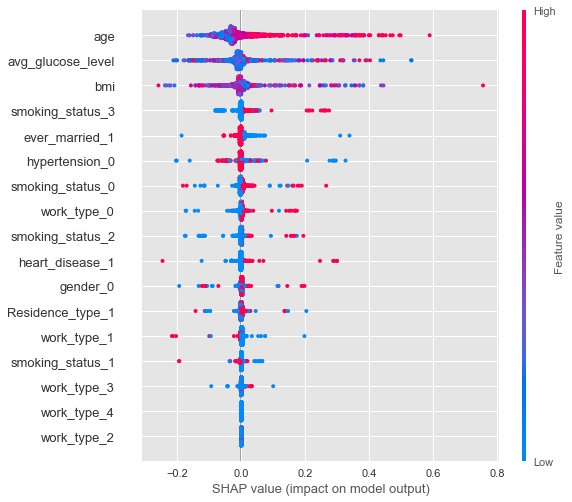

In [155]:
# Melhor forma de apresentar (interpretar) os dados do modelo
interpret_model(dt)

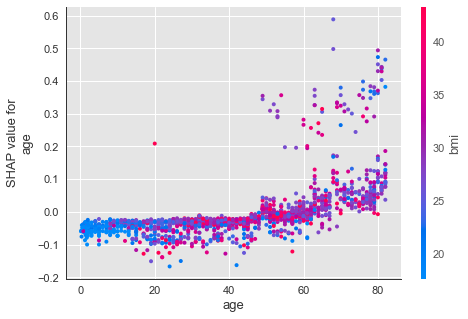

In [159]:
interpret_model(dt,plot='correlation')

In [158]:
interpret_model(dt,plot='reason')

#### Notas

- Respectivamente, as três features que mais impactam no diagnóstico são: idade, taxa de glicose e bmi

__@todo: adicionar mais notas observadas__

### Relacionamento em pares 2
----

#### a. Taxa de glicose x BMI

In [160]:
fig = ff.create_2d_density(
    x=df['avg_glucose_level'],
    y=df['bmi'],
    title="Taxa de glicose x BMI",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)
fig.show()
fig = ff.create_2d_density(
    x=df['ever_married'],
    y=df['bmi'],
    title="Casamento x BMI",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)
fig.show()
fig = ff.create_2d_density(
    x=df['ever_married'],
    y=df['avg_glucose_level'],
    title="Casamento x Taxa de glicose",
    colorscale=['#7A4579', '#D56073', 'rgb(236,158,105)', (1, 1, 0.2), (0.98,0.98,0.98)]
)
fig.show()

__@todo: criar outros plots para comparação, exemplo: bmi x ever_married__

### Predição do Modelo
----

In [161]:
# Cria um modelo preditivo
# Pega todas as variáveis de entrada, joga pro modelo e emite o resultado
pred = predict_model(best)

In [162]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1473 non-null   float32
 1   avg_glucose_level  1473 non-null   float32
 2   bmi                1473 non-null   float32
 3   gender_0           1473 non-null   float32
 4   hypertension_0     1473 non-null   float32
 5   heart_disease_1    1473 non-null   float32
 6   ever_married_1     1473 non-null   float32
 7   work_type_0        1473 non-null   float32
 8   work_type_1        1473 non-null   float32
 9   work_type_2        1473 non-null   float32
 10  work_type_3        1473 non-null   float32
 11  work_type_4        1473 non-null   float32
 12  Residence_type_1   1473 non-null   float32
 13  smoking_status_0   1473 non-null   float32
 14  smoking_status_1   1473 non-null   float32
 15  smoking_status_2   1473 non-null   float32
 16  smoking_status_3   1473 

In [163]:
pred

age  avg_glucose_level        bmi  gender_0  hypertension_0  \
0     15.00          74.830002  17.400000       0.0             1.0   
1     10.00          57.279999  15.400000       1.0             1.0   
2     50.00          76.550003  29.000000       1.0             1.0   
3     47.00         101.989998  36.299999       0.0             1.0   
4     55.00         198.360001  29.100000       1.0             1.0   
...     ...                ...        ...       ...             ...   
1468   1.16          86.000000  13.300000       1.0             1.0   
1469   1.08         109.330002  18.200001       1.0             1.0   
1470   0.16          69.790001  13.000000       0.0             1.0   
1471  23.00          91.970001  21.600000       1.0             1.0   
1472  25.00          60.840000  24.500000       1.0             1.0   

      heart_disease_1  ever_married_1  work_type_0  work_type_1  work_type_2  \
0                 0.0             0.0          0.0          0.0          1.0   
1                 0.0             0.0          0.0          0.0          1.0   
2                 0.0             1.0          1.0          0.0          0.0   
3                 0.0             0.0          1.0          0.0          0.0   
4                 0.0             1.0          0.0          0.0          0.0   
...               ...             ...          ...          ...          ...   
1468              0.0             0.0          0.0          0.0          1.0   
1469              0.0             0.0          0.0          0.0          1.0   
1470              0.0             0.0          0.0          0.0          1.0   
1471              0.0             1.0          1.0          0.0          0.0   
1472              0.0             1.0          1.0          0.0          0.0   

      work_type_3  work_type_4  Residence_type_1  smoking_status_0  \
0             0.0          0.0               1.0               0.0   
1             0.0          0.0               0.0               1.0   
2             0.0          0.0               1.0               0.0   
3             0.0          0.0               1.0               1.0   
4             1.0          0.0               0.0               0.0   
...           ...          ...               ...               ...   
1468          0.0          0.0               0.0               0.0   
1469          0.0          0.0               0.0               0.0   
1470          0.0          0.0               1.0               0.0   
1471          0.0          0.0               1.0               0.0   
1472          0.0          0.0               0.0               1.0   

      smoking_status_1  smoking_status_2  smoking_status_3 stroke     Label  
0                  1.0               0.0               0.0      0  0.015782  
1                  0.0               0.0               0.0      0  0.009909  
2                  0.0               0.0               1.0      0  0.046838  
3                  0.0               0.0               0.0      0  0.051557  
4                  0.0               0.0               1.0      0  0.093238  
...                ...               ...               ...    ...       ...  
1468               1.0               0.0               0.0      0 -0.005911  
1469               1.0               0.0               0.0      0 -0.002768  
1470               1.0               0.0               0.0      0 -0.022278  
1471               0.0               1.0               0.0      0 -0.042406  
1472               0.0               0.0               0.0      0 -0.031599  

[1473 rows x 19 columns]

__@todo: melhorar análise do modelo preditivo__